In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Load the noisy image

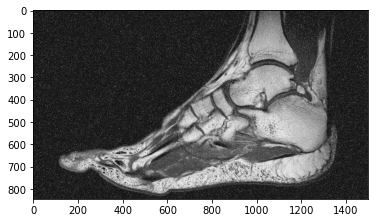

In [2]:
noisy_img = cv2.imread('noisy_img.png', 0)
plt.imshow(noisy_img, cmap='gray', vmin=noisy_img.min(), vmax=noisy_img.max())

In [3]:
noisy_img.shape

(844, 1500)

### 2. Detect noise distribution type by cropping a proper part of the image

In [4]:
proper_pt = noisy_img[0:844, 0:110]

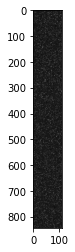

In [5]:
plt.imshow(proper_pt, cmap='gray', vmin=proper_pt.min(), vmax=proper_pt.max())

#### Plot the histogram of the intensities.



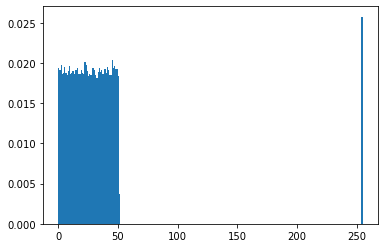

In [6]:
plt.hist(proper_pt.ravel(), density = True, bins=[i for i in range(proper_pt.min(), proper_pt.max() + 1)]);

#### TODO: What type is it???

### 3. Implement Alpha-trimmed mean filter

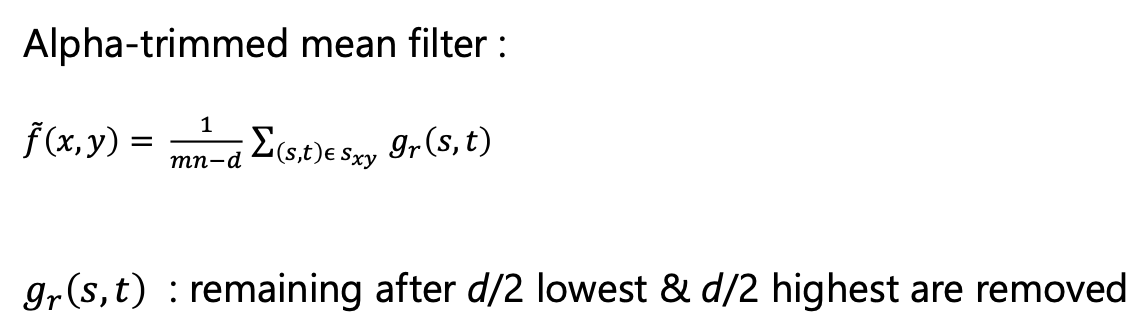

In [7]:
mylist = [4,5,6,7,8,9,1,2,3]

In [8]:
sum(mylist[5:-2])

10

#### 5*5 kernel --> r = 2
#### d = 10

In [9]:
def alpha_trimmed_mean_filter(img, kernel_size, d):
    r = kernel_size // 2
    # pad the image using mirror padding
    padded_image = np.pad(img, r, mode='symmetric')
    n, m = img.shape
    filtered_img = np.zeros(img.shape)
    # loop through all pixels
    for i in range(n):
        for j in range(m):
            # neighbors = []
            neighbors = list(padded_image[i-r:i+r+1, j-r:j+r+1].reshape(-1))
            neighbors.sort()
            neighbors_pruned = neighbors[r:-r]
            filtered_img[i, j] = (1/(m*n - d)) * sum(neighbors_pruned)
    return filtered_img

In [10]:
kernel_size, d = 5, 10
filtered_img = alpha_trimmed_mean_filter(noisy_img, kernel_size, d)

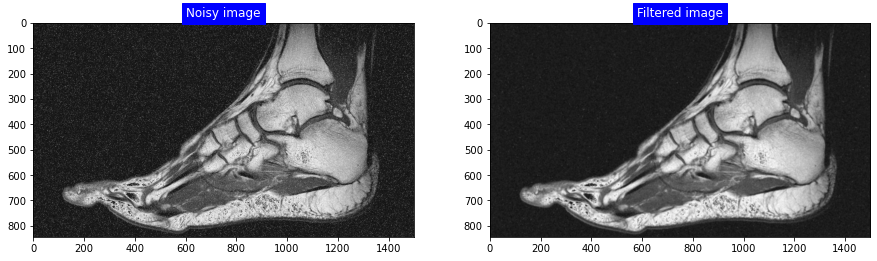

In [11]:
# Plot
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(1, 2)

# original image
ax1 = fig.add_subplot(gs[0, 0])
# ax1.imshow(chest_img, cmap='gray')
ax1.set_title('Noisy image', color='white', backgroundcolor='blue')
plt.imshow(noisy_img, cmap='gray', vmin=noisy_img.min(), vmax=noisy_img.max())

# filtered image
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title('Filtered image', color='white', backgroundcolor='blue')
plt.imshow(filtered_img, cmap='gray', vmin=filtered_img.min(), vmax=filtered_img.max())

### 4. Load the degraded image

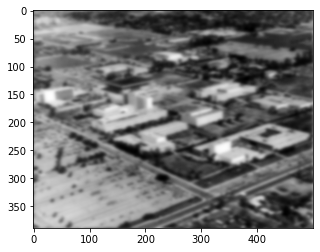

In [12]:
noisy_img = cv2.imread('degraded_img.png', 0)
plt.imshow(noisy_img, cmap='gray', vmin=noisy_img.min(), vmax=noisy_img.max())